<a href="https://colab.research.google.com/github/ravann/2022-TF-examples/blob/master/courses/udacity_intro_to_tensorflow_for_deep_learning/l02c01_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Purpose

Build a model to predict the equation : y = 3x + 20

In [1]:
## Import dependencies

import numpy as np
import tensorflow as tf
import logging

## Sample values



In [2]:
x = np.array([5.0, 6.6, 22.12, 55.5, 87.6, 9, 202.8], dtype=float)

In [3]:
y = 3 * x + 20

In [4]:
y

array([ 35.  ,  39.8 ,  86.36, 186.5 , 282.8 ,  47.  , 628.4 ])

## Build the model

In [5]:
dense10 = tf.keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([dense10])

In [6]:
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1))

## Train the model

In [7]:
history = model.fit(x, y, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


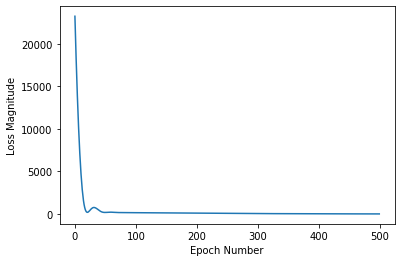

In [8]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

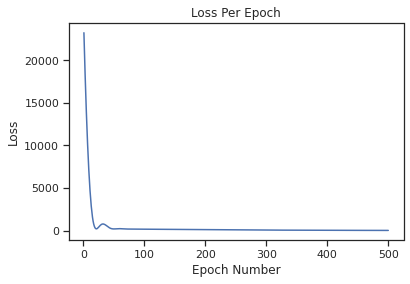

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

xaxs_val = np.arange(1, len(history.history['loss']) + 1)

axs = sns.lineplot(x = xaxs_val, y = history.history['loss'])
axs.set(xlabel='Epoch Number', ylabel='Loss', title = 'Loss Per Epoch')

plt.show()

## Predict some values and compare with the expected values

In [11]:
predict_x = np.array([1, 2, 3, 4, 5, 120, 150, 180], dtype=float)

In [12]:
expected = predict_x * 3 + 20
expected

array([ 23.,  26.,  29.,  32.,  35., 380., 470., 560.])

In [13]:
model.predict(predict_x)

array([[ 18.944153],
       [ 21.974634],
       [ 25.005117],
       [ 28.035599],
       [ 31.066082],
       [379.57156 ],
       [470.48605 ],
       [561.4006  ]], dtype=float32)

### Observation

The model performs well at large numbers.  Is it because the model is not trained well at small numbers?

## Retrain the model with more snall numbers

In [14]:
new_features = np.array([1, 3, 2.5, 3.6, 4.8, 5.9, 6, 9, 11, 12.4, 13.56, 15.8, 22, 25, 28, 32, 45, 78, 200, 2345.78], dtype=float)
new_labels = new_features * 3 + 20

In [15]:
history = model.fit(new_features, new_labels, epochs=500, verbose=False)
print("Finished training the model")

Finished training the model


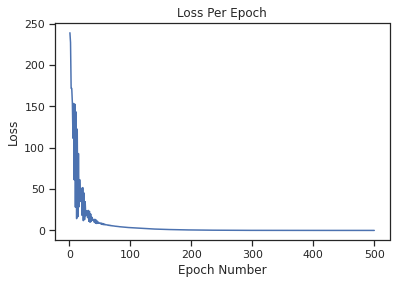

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

xaxs_val = np.arange(1, len(history.history['loss']) + 1)

axs = sns.lineplot(x = xaxs_val, y = history.history['loss'])
axs.set(xlabel='Epoch Number', ylabel='Loss', title = 'Loss Per Epoch')

plt.show()

In [17]:
predict_x = np.array([1, 2, 3, 4, 5, 120, 150, 180, 250, 6789, 12567], dtype=float)
expected = predict_x * 3 + 20
expected

array([2.3000e+01, 2.6000e+01, 2.9000e+01, 3.2000e+01, 3.5000e+01,
       3.8000e+02, 4.7000e+02, 5.6000e+02, 7.7000e+02, 2.0387e+04,
       3.7721e+04])

In [18]:
model.predict(predict_x)

array([[2.2974493e+01],
       [2.5974506e+01],
       [2.8974518e+01],
       [3.1974531e+01],
       [3.4974545e+01],
       [3.7997604e+02],
       [4.6997641e+02],
       [5.5997681e+02],
       [7.6997772e+02],
       [2.0387062e+04],
       [3.7721133e+04]], dtype=float32)

## Explore the model values

In [19]:
dense10